<a href="https://colab.research.google.com/github/AlfaIV/Electronics-and-Circuitry/blob/main/%D0%A6%D0%A3%D0%B8%D0%9C%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install schemdraw

In [ ]:
import pandas as pd
import sympy as sym
import schemdraw.logic as logic

In [ ]:
Q1,Q2,Q3,Q4= sym.symbols("Q1,Q2,Q3,Q4")

# ДОМАШНЕЕ ЗАДАНИЕ №1
# ПО КУРСУ "ЦИФРОВЫЕ УСТРОЙСТВА И МИКРОПРОЦЕССОРЫ".

Спроектировать логическую устройство (счетчик на любой модуль счета), реализующий заданную последовательность состояний. 

1.	Составить таблицу истинности согласно заданной последовательности состояний.
2.	Записать логические функции, используя СНДФ. 
3.	Произвести минимизацию функций по правилам алгебры логики.
4.	Минимизировать функции с помощью карт Карно. 
5.	Согласно минимизированным логическим функциям построить комбинационную логическую схему.
6.	Разработать логическую устройство, соединив в одной схеме комбинационную логическую схему и триггеры счетчика.
7.	Проверить работу счетчика с помощью программ моделирования МС или Multisim
8.	Составить принципиальную схему цифрового устройства, используя реальные логические интегральные схемы  ТТЛ-логики. Минимизировать количество корпусов микросхем. 
9.	Оформить задание и принципиальную схему с соблюдением ГОСТ.

Справочник по ТТЛ МС автор Козак Виктор Романович можно найти по ссылке 
http://www.qrz.ru/reference/kozak/ttl/ttlh00.shtml


| Номер варианта |	Состояния счетчика     |
|----------------|:------------------------|
| 58	           | 7- 4- 5- 6- 8- 12- 2- 3 |

# Ввод начальных условий

In [ ]:
In = [7,4,5,6,8,12,2,3]
len(In)

8

In [ ]:
len(bin(max(In))[2:])

4

In [ ]:
N = 2**len(bin(max(In))[2:])
notorder = list({i for i in range(N)}.difference(set(In)))
notorder

[0, 1, 9, 10, 11, 13, 14, 15]

Перевод в двоичную систему счисления

In [ ]:
In_byte = [bin(i)[2:] for i in In]
In_byte

['111', '100', '101', '110', '1000', '1100', '10', '11']

In [ ]:
notorder_byte = [bin(i)[2:] for i in notorder]
notorder_byte

['0', '1', '1001', '1010', '1011', '1101', '1110', '1111']

In [ ]:
len(notorder_byte)

8

Функция дозаполнения 0-ми до нужной разрядности двоичной записи числа

In [ ]:
def To_N_Byte(n,byte):
  if len(byte) < n:
    #ret_byte = [0 for i in range(n - len(byte))]
    #print(ret_byte)
    #print([i for i in byte])
    #print(ret_byte + [i for i in byte])
    return [0 for i in range(n - len(byte))] + [int(i) for i in byte]
  else:
    return [int(i) for i in byte]
To_N_Byte(4,In_byte[0])

[0, 1, 1, 1]

Логика переходов задает последовательность изменения состояний, а число триггеров определено модулем счета счетчика. В данном случае максимальным числом, который должен показывать счетчик «1011» десятичный эквивалент «11». Это число в двоичном коде представляется 4 разрядами, следовательно, необходимо не менее 4 триггеров для двоичного счетчика.

Первое состояние 110 (D=6) с выхода КЛС (D1,D2,D3,D4) подается на установочный вход D-триггеров и появится на выходе триггеров (Q1,Q2,Q3,Q4) после прихода тактового импульса на вход «Т». С выходов триггеров 110 одновременно подаются на вход КЛС, которая должна сгенерировать на выходах (D1,D2,D3) следующее состояние 1011. С приходом тактового импульса на выходе триггеров установится это состояние. КЛС далее должна сгенерировать следующее состояние 11 и так далее. Этой логике работы соответствует таблица истинности, представленная ниже в таблице 1.


In [ ]:
index_pd_frame = [[str(i)] for i in In]
value_pd_frame = [To_N_Byte(4,In_byte[i]) for i in range(len(In))]
[index_pd_frame[i].extend(value_pd_frame[i]) for i in range(len(In))]
column_name = ["N","Q1","Q2","Q3","Q4"]
index_pd_frame

[['7', 0, 1, 1, 1],
 ['4', 0, 1, 0, 0],
 ['5', 0, 1, 0, 1],
 ['6', 0, 1, 1, 0],
 ['8', 1, 0, 0, 0],
 ['12', 1, 1, 0, 0],
 ['2', 0, 0, 1, 0],
 ['3', 0, 0, 1, 1]]

Таблица 1

Текущее состояние счетчика

In [ ]:
Table1 = pd.DataFrame(index_pd_frame,
                      columns=column_name)
Table1

,N,Q1,Q2,Q3,Q4
0,7,0,1,1,1
1,4,0,1,0,0
2,5,0,1,0,1
3,6,0,1,1,0
4,8,1,0,0,0
5,12,1,1,0,0
6,2,0,0,1,0
7,3,0,0,1,1


In [ ]:
value_pd_frame2 = value_pd_frame[1:]
value_pd_frame2.append(value_pd_frame[0])
index_pd_frame2 = index_pd_frame[1:]
index_pd_frame2.append(index_pd_frame[0])
#[index_pd_frame2[i].extend(value_pd_frame2[i]) for i in range(len(In))]
column_name2 = ["N","D1","D2","D3","D4"]
index_pd_frame2


[['4', 0, 1, 0, 0],
 ['5', 0, 1, 0, 1],
 ['6', 0, 1, 1, 0],
 ['8', 1, 0, 0, 0],
 ['12', 1, 1, 0, 0],
 ['2', 0, 0, 1, 0],
 ['3', 0, 0, 1, 1],
 ['7', 0, 1, 1, 1]]

Последующее состояние счетчика

In [ ]:
Table1_2 = pd.DataFrame(index_pd_frame2,
                        columns=column_name2)
Table1_2

,N,D1,D2,D3,D4
0,4,0,1,0,0
1,5,0,1,0,1
2,6,0,1,1,0
3,8,1,0,0,0
4,12,1,1,0,0
5,2,0,0,1,0
6,3,0,0,1,1
7,7,0,1,1,1


|Текущее состояние счетчика |	Последующее состояние счетчика|
|---------------------------|-------------------------------|

In [ ]:
Table1_3 = pd.concat([Table1,Table1_2],axis=1)
Table1_3

,N,Q1,Q2,Q3,Q4,N,D1,D2,D3,D4
0,7,0,1,1,1,4,0,1,0,0
1,4,0,1,0,0,5,0,1,0,1
2,5,0,1,0,1,6,0,1,1,0
3,6,0,1,1,0,8,1,0,0,0
4,8,1,0,0,0,12,1,1,0,0
5,12,1,1,0,0,2,0,0,1,0
6,2,0,0,1,0,3,0,0,1,1
7,3,0,0,1,1,7,0,1,1,1


# Расчет и упрощение логических функций

Составим логические функции согласно этой таблице истинности для D1, D2, D3, D4 от Q1, Q2, Q3, Q4 используя совершенные СНДФ.

In [ ]:
def Parse(data, order):
  Kmap_str = ""
  for i in order:
    if(data[int(i) - 1] == 1):
      Kmap_str += "0"
    else:
      Kmap_str += "1"

  return Kmap_str
#Parse(minterms_D1[0],'1324')
#Parse(To_N_Byte(4,notorder_byte[1]),'1324')


Каждую функцию минимизируем с помощью карт Карно.

## D1

In [ ]:
Table1_3[Table1_3["D1"] == 1][["Q1","Q2","Q3","Q4"]]

,Q1,Q2,Q3,Q4
3,0,1,1,0
4,1,0,0,0


In [ ]:
#notorder = [11,3,8,7,0,4]
minterms_D1 = Table1_3[Table1_3["D1"] == 1][["Q1","Q2","Q3","Q4"]].to_numpy()
minterms_D1 = minterms_D1.tolist()
#minterms = Table1_3[Table1_3["D1"] == "1"][["Q1","Q2","Q3","Q4"]].to_dict()
print(minterms_D1)
#type(minterms)

[[0, 1, 1, 0], [1, 0, 0, 0]]


In [ ]:
D1 = sym.logic.boolalg.SOPform([Q1,Q2,Q3,Q4], minterms_D1, dontcares = notorder)
print(D1)

(~Q2 & ~Q3) | (Q2 & Q3 & ~Q4)


In [ ]:
D1

(~Q2 & ~Q3) | (Q2 & Q3 & ~Q4)

In [ ]:
#D1 = ~Q1&Q2&Q3&~Q4 | ~Q1&Q2&~Q3&Q4
#print(D1)

In [ ]:
#D1_S = sym.simplify_logic(D1, form ="dnf")
#print(D1_S)

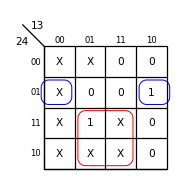

In [ ]:
logic.Kmap(names='1324',
           truthtable=[(Parse(To_N_Byte(4,notorder_byte[0]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[1]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[2]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[3]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[4]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[5]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[6]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[7]),'1324'),"X"),

                       
                       (Parse(minterms_D1[0],'1324'),"1"),
                       (Parse(minterms_D1[1],'1324'),"1")],
           
            groups={'.11.':{"color":"red"},
                    '.001':{"color":"blue"},
                   }
          )

## D2

In [ ]:
Table1_3[Table1_3["D2"] == 1][["Q1","Q2","Q3","Q4"]]

,Q1,Q2,Q3,Q4
0,0,1,1,1
1,0,1,0,0
2,0,1,0,1
4,1,0,0,0
7,0,0,1,1


In [ ]:
minterms_D2 = Table1_3[Table1_3["D2"] == 1][["Q1","Q2","Q3","Q4"]].to_numpy()
minterms_D2 = minterms_D2.tolist()
print(minterms_D2)

[[0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]


In [ ]:
D2 = sym.logic.boolalg.SOPform([Q1,Q2,Q3,Q4], minterms_D2, dontcares = notorder)
print(D2)

Q4 | (~Q1 & ~Q3) | (~Q2 & ~Q3)


In [ ]:
D2

Q4 | (~Q1 & ~Q3) | (~Q2 & ~Q3)

In [ ]:
#D2 = ~Q1&~Q2&Q3&Q4 | Q1&~Q2&~Q3&~Q4 | ~Q1&~Q2&~Q3&~Q4 | ~Q1&Q2&~Q3&~Q4
#print(D2)

In [ ]:
#print(sym.simplify_logic(D2, form ="dnf"))

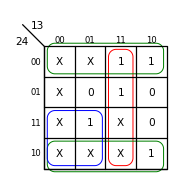

In [ ]:
logic.Kmap(names='1324',
           truthtable=[(Parse(To_N_Byte(4,notorder_byte[0]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[1]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[2]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[3]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[4]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[5]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[6]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[7]),'1324'),"X"),
                       
                       (Parse(minterms_D2[0],'1324'),"1"),
                       (Parse(minterms_D2[1],'1324'),"1"),
                       (Parse(minterms_D2[2],'1324'),"1"),
                       (Parse(minterms_D2[3],'1324'),"1"),
                       (Parse(minterms_D2[4],'1324'),"1"),
                       ],
           groups={'11..':{"color":"red"},
                   '...0':{"color":"green"},
                   '0.1.':{"color":"blue"},
            }
           )

## D3

In [ ]:
Table1_3[Table1_3["D3"] == 1][["Q1","Q2","Q3","Q4"]]

,Q1,Q2,Q3,Q4
2,0,1,0,1
5,1,1,0,0
6,0,0,1,0
7,0,0,1,1


In [ ]:
minterms_D3 = Table1_3[Table1_3["D3"] == 1][["Q1","Q2","Q3","Q4"]].to_numpy()
minterms_D3 = minterms_D3.tolist()
print(minterms_D3)

[[0, 1, 0, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1]]


In [ ]:
D3 = sym.logic.boolalg.SOPform([Q1,Q2,Q3,Q4], minterms_D3, dontcares = notorder)
print(D3)

(Q1 & Q2) | (Q4 & ~Q3) | (~Q1 & ~Q2)


In [ ]:
D3

(Q1 & Q2) | (Q4 & ~Q3) | (~Q1 & ~Q2)

In [ ]:
#D3 = ~Q1&Q2&Q3&~Q4 | Q1&~Q2&Q3&Q4 | Q1&~Q2&~Q3&~Q4 | ~Q1&Q2&~Q3&~Q4
#D3

In [ ]:
#print(sym.simplify_logic(D3, form ="dnf"))

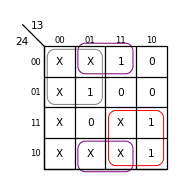

In [ ]:
logic.Kmap(names='1324',
           truthtable=[(Parse(To_N_Byte(4,notorder_byte[0]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[1]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[2]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[3]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[4]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[5]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[6]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[7]),'1324'),"X"),
                       
                       (Parse(minterms_D3[0],'1324'),"1"),
                       (Parse(minterms_D3[1],'1324'),"1"),
                       (Parse(minterms_D3[2],'1324'),"1"),
                       (Parse(minterms_D3[3],'1324'),"1"),
                       ],
           groups={'1.1.':{"color":"red"},
                   '.1.0':{"color":"purple"},
                   '0.0.':{"color":"grey"},
                   }
           )

## D4

In [ ]:
Table1_3[Table1_3["D4"] == 1][["Q1","Q2","Q3","Q4"]]

,Q1,Q2,Q3,Q4
1,0,1,0,0
6,0,0,1,0
7,0,0,1,1


In [ ]:
minterms_D4 = Table1_3[Table1_3["D4"] == 1][["Q1","Q2","Q3","Q4"]].to_numpy()
minterms_D4 = minterms_D4.tolist()
print(minterms_D4)

[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1]]


In [ ]:
D4 = sym.logic.boolalg.SOPform([Q1,Q2,Q3,Q4], minterms_D4, dontcares = notorder)
print(D4)

(~Q1 & ~Q2) | (~Q1 & ~Q3 & ~Q4)


In [ ]:
D4

(~Q1 & ~Q2) | (~Q1 & ~Q3 & ~Q4)

In [ ]:
#D4 = ~Q1&Q2&Q3&~Q4 | Q1&~Q2&Q3&Q4 | ~Q1&~Q2&Q3&Q4 | Q1&~Q2&~Q3&~Q4
#D4

In [ ]:
#print(sym.simplify_logic(D4, form ="dnf"))

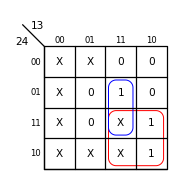

In [ ]:
logic.Kmap(names='1324',
           truthtable=[(Parse(To_N_Byte(4,notorder_byte[0]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[1]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[2]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[3]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[4]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[5]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[6]),'1324'),"X"),
                       (Parse(To_N_Byte(4,notorder_byte[7]),'1324'),"X"),
                       
                       
                       (Parse(minterms_D4[0],'1324'),"1"),
                       (Parse(minterms_D4[1],'1324'),"1"),
                       (Parse(minterms_D4[2],'1324'),"1"),
                       
                       ],
           groups={'1.1.':{"color":"red"},
                   '11.1':{"color":"blue"},
                   #'.0.1':{"color":"green"}
                   })

## Итог

Согласно минимизированным функциям D1, D2, и D3  составим КЛС, используя элементарные логические схемы И, ИЛИ, НЕ.

# Построение логических схем

In [ ]:
from schemdraw.parsing import logicparse

Для триггера Т3 функция на его входе D1

In [ ]:
type(D1)
str(D1)

'(~Q2 & ~Q3) | (Q2 & Q3 & ~Q4)'

Для триггера Т1 функция на его входе D1

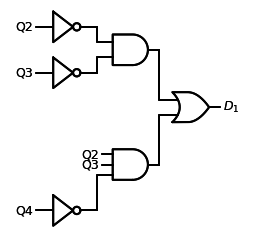

In [ ]:
#logicparse('(Q2 & Q3 & ~Q1 & ~Q4) | (Q2 & Q4 & ~Q1 & ~Q3)', outlabel='${D_1}$', gateH=1.5)
logicparse(str(D1), outlabel='${D_1}$', gateH=1.5)

Для триггера Т2 функция на его входе D2

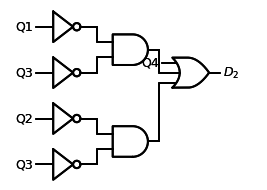

In [ ]:
#logicparse('(~Q1 & ~Q3 & ~Q4) | (~Q2 & ~Q3 & ~Q4) | (Q3 & Q4 & ~Q1 & ~Q2)', outlabel='${D_2}$', gateH=1.5)
logicparse(str(D2), outlabel='${D_2}$', gateH=1.5)

Для триггера Т3 функция на его входе D3

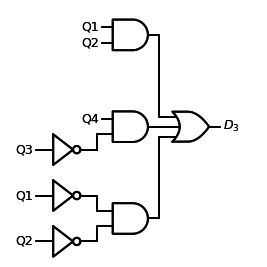

In [ ]:
#logicparse('(Q2 & ~Q1 & ~Q4) | (Q1 & Q3 & Q4 & ~Q2) | (Q1 & ~Q2 & ~Q3 & ~Q4)', gateH=1.5)
logicparse(str(D3), gateH=1.5, outlabel='${D_3}$')

Для триггера Т4 функция на его входе D4

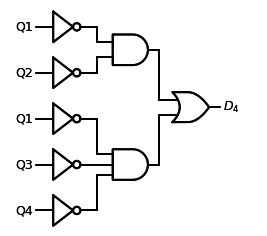

In [ ]:
#logicparse('(Q3 & Q4 & ~Q2) | (Q2 & Q3 & ~Q1 & ~Q4) | (Q1 & ~Q2 & ~Q3 & ~Q4)', outlabel='${D_3}$', gateH=1.5)
logicparse(str(D4), gateH=1.5, outlabel='${D_4}$')

# Моделирование

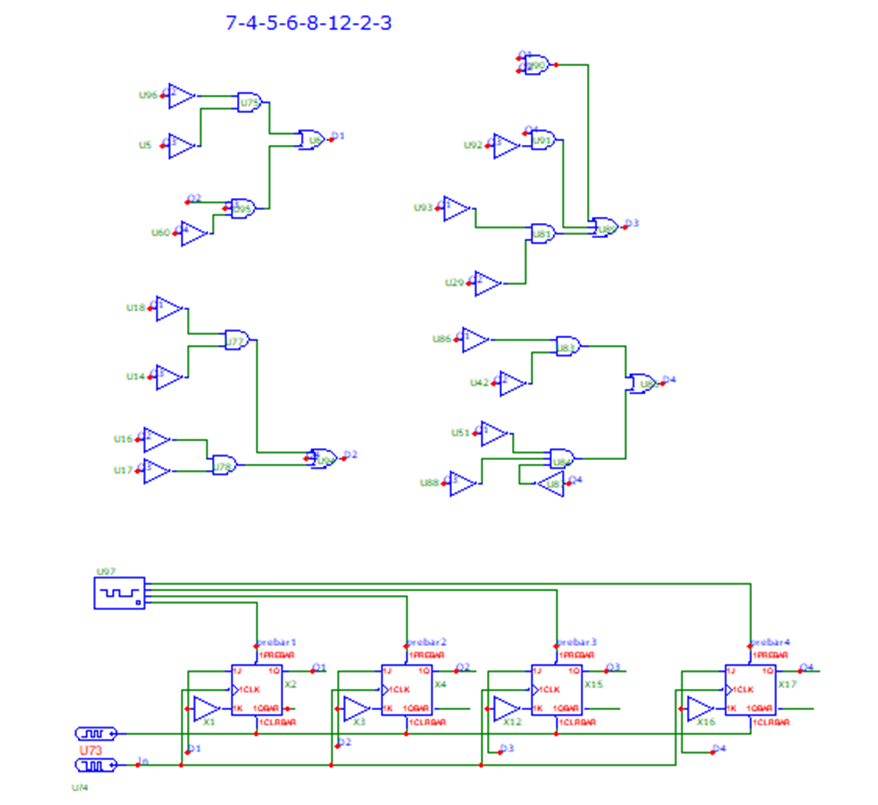

Результаты временного анализа

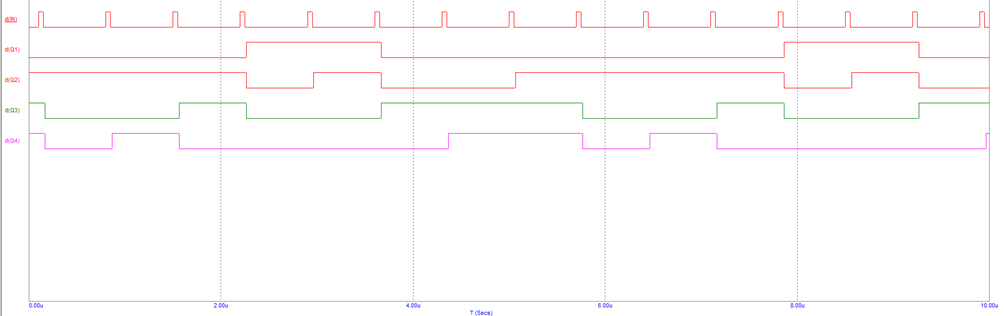